<a href="https://colab.research.google.com/github/evgeny-kolonsky/summer_seminar/blob/main/Seminar_part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Summer Seminar - part 3

Code snippets

v.0.1.2

# 3.1 Linear regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy.optimize import curve_fit

## Simple Linear regression

$$
y = ax + b
$$

In [2]:
import numpy as np
from scipy.stats import linregress

x = np.array([1, 2, 3, 4, 5])  # Independent variable
y = np.array([5, 6, 8, 10, 14])  # Dependent variable

fit = linregress(x, y)
slope = fit.slope
intercept = fit.intercept
slope_err = fit.stderr
intercept_err = fit.intercept_stderr
print(f'Linear fit parameters:')
print(f'slope    : {slope:.1f} ± {slope_err:.1f}')
print(f'intercept: {intercept:.1f} ± {intercept_err:.1f}')

Linear fit parameters:
slope    : 2.2 ± 0.3
intercept: 2.0 ± 1.0


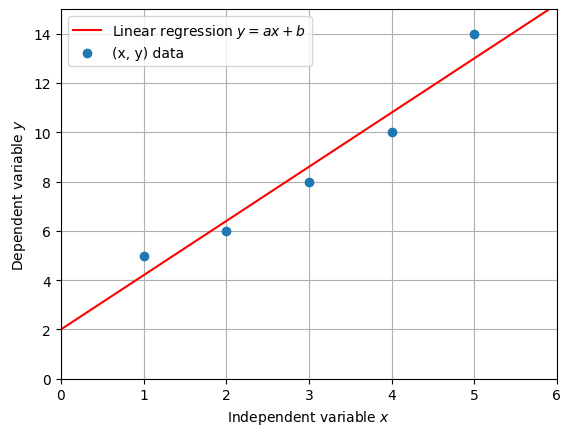

In [3]:
X = np.linspace(0,6)
Y = X * slope + intercept

plt.plot(X, Y, color='red', label=r'Linear regression $y = ax+b$')
plt.plot(x, y, 'o', label='(x, y) data')

plt.xlabel(r'Independent variable $x$')
plt.ylabel(r'Dependent variable $y$')
plt.grid('on')
plt.xlim(0,6)
plt.ylim(0,15)
plt.legend()

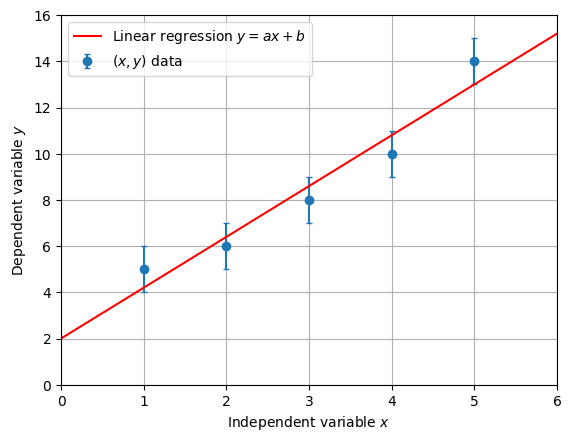

In [4]:
X = np.linspace(0,6)
Y = X * slope + intercept
y_error = 1

plt.errorbar(x, y, yerr=y_error, fmt='o', ls='', capsize=2, label=r'$(x,y)$ data')

plt.plot(X, Y, color='red', label=r'Linear regression $y = ax+b$')

plt.xlabel(r'Independent variable $x$')
plt.ylabel(r'Dependent variable $y$')
plt.grid('on')
plt.xlim(0,6)
plt.ylim(0,16)
plt.legend()

# Linear regression without intercept

$$
y = k x
$$


In [5]:
x = np.array([1, 2, 3, 4, 5])  # Independent variable
y = np.array([5, 6, 8, 10, 14])  # Dependent variable
y_error = 1

def weighted_average(values, errors):
  weights = 1 / errors**2
  average  = np.sum(weights * values) / np.sum(weights)
  error_of_average = np.sqrt(1 / np.sum(weights))
  return average, error_of_average

k, k_error  = weighted_average(y/x, y_error/x)
print(f'Linear fit without intercept:')
print(f'Slope    : {k:.1f} ± {k_error:.1f}')

Linear fit without intercept:
Slope    : 2.7 ± 0.1


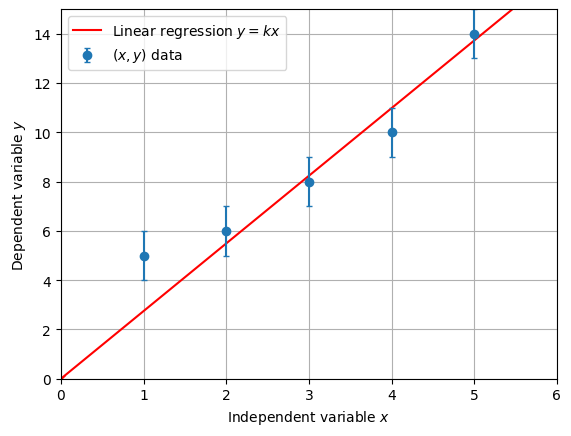

In [6]:
X = np.linspace(0,6)
Y = X * k

plt.plot(X, Y, color='red', label=r'Linear regression $y = kx$')
#plt.fill_between(X, X*(k-k_error), X*(k+k_error), color='red', alpha=0.1, label='Uncertainty')
plt.plot(0,0, 'x', color='red')
plt.errorbar(x, y, yerr=y_error, fmt='o', ls='', capsize=2, label=r'$(x,y)$ data')

plt.xlabel(r'Independent variable $x$')
plt.ylabel(r'Dependent variable $y$')
plt.grid('on')
plt.legend()
plt.xlim(0,6)
plt.ylim(0,15)
plt.show()

# Example: Co-60 attenuation in lead



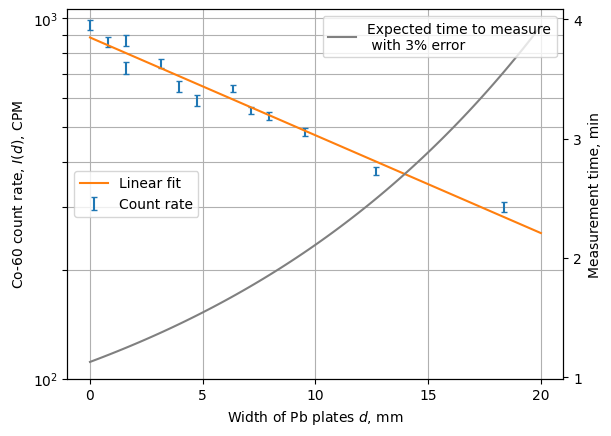

In [7]:
data = '''
# beta range in Pb
# Co-60 (sample #3)
# width in um, acq time in sec, intensity in counts
0  60  960
790  60  860
#2380  60  638
1590  60  730
#3180  60  681
1590  60  870
3170  90  1127
6350  200  2128
4760  90  889
3960  90  971
7140  200  1854
7940  200  1785
9520  200  1613
12700  200  1258
18350  200  1001
'''
width, time, counts = np.genfromtxt(data.splitlines(), usecols=[0,1,2]).T

width /= 1e3
counts_error = np.sqrt(counts)
relative_error = 1/np.sqrt(counts)
CPM_rate = counts / time * 60 # CPM
rate_error = CPM_rate * relative_error

# linearize and fit
fit = linregress(width, np.log(CPM_rate))
wdense = np.linspace(0, 20, 100)
expected_CPM = np.exp(fit.intercept + fit.slope * wdense)

# time to measure 1000 counts
expected_time = 1000 / expected_CPM
fig, ax = plt.subplots()
ax1 = ax.twinx()
ax.errorbar(width, CPM_rate, rate_error, fmt='', ls='', capsize=2, label=r'Count rate')
ax.plot(wdense, np.exp(fit.intercept + fit.slope * wdense), label='Linear fit')
ax1.plot(wdense, expected_time, color='gray', label='Expected time to measure\n with 3% error')
ax.set_yscale('log')
ax.set_yticks([ 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000])
plt.gca().set_xticks([ 0, 5, 10, 15, 20])
ax.set_xlabel(r'Width of Pb plates $d$, mm')
ax.set_ylabel('Co-60 count rate, $I(d)$, CPM')
ax1.set_ylabel('Measurement time, min')
ax1.set_yticks([1, 2, 3, 4])
ax.grid('on')
ax1.grid('off')
ax.legend(loc='center left')
ax1.legend(loc='upper right')
plt.grid()

When uncertainty is kept constant as required by the experiment manual, linearization and linregress analysis is perfectly correct.

# Example: Capacitors plates discharge

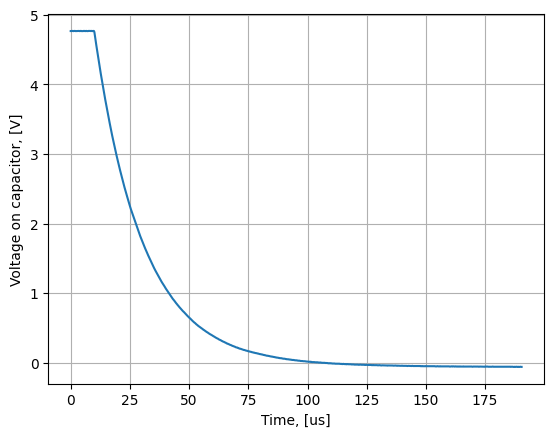

In [8]:
url = 'https://raw.githubusercontent.com/tphlabs/data/main/Lab2_C/Trace%200.csv'
t, V1, V2 = np.loadtxt(url, delimiter=',', skiprows=46, usecols=[3,4,5]).T
t -= t[0]
Vc = V1 - V2

# plot v(t)
plt.plot(t*1e6, Vc, '-')
plt.xlabel('Time, [us]')
plt.ylabel('Voltage on capacitor, [V]')
plt.grid()


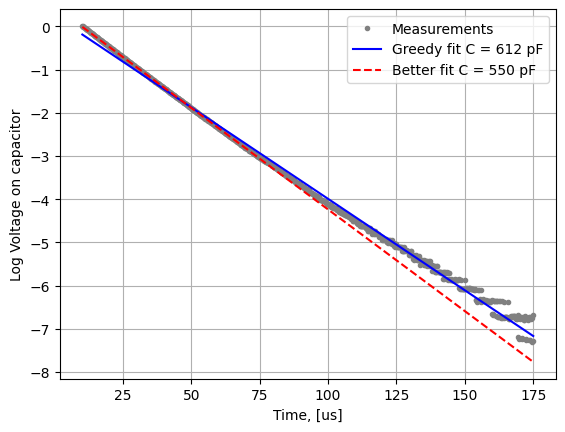

In [9]:
# cut: take only exponential discharge part of data
t0 = 10e-6 # start point
t1 = 175e-6 # end point
discharge_period = (t > t0) & (t < t1)

# Resistors:
R1 = 37.6e3 # kOhm,
R2 = 992 # ohm,
# Full resistance
R = R1 + R2

# voltage on capacitor plates observed after full disharge
V_offset = -0.058 # V

# what if we get take only the half of data with higher accuracy
t0 = 10e-6 # start point
t2 = 75e-6 # end point
fit_period = (t > t0) & (t < t2)

logvc_discharge = np.log((Vc[discharge_period] - V_offset) / Vc[discharge_period][0])
timevc_discharge = t[discharge_period]
plt.plot(timevc_discharge*1e6, logvc_discharge, '.', label='Measurements', color='gray')

# fit over all discharge time, no matter what uncertainty is
fit1 = linregress(timevc_discharge, logvc_discharge)
tau1 = -1 / fit1.slope
C_RC1 = tau1 / R
plt.plot(timevc_discharge*1e6, fit1.intercept + fit1.slope * timevc_discharge,
         color='blue', label=f'Greedy fit C = {C_RC1*1e12:.0f} pF')

# fit over rather accurate part of data, do not take low signal big uncertainty data
logvc_fit = np.log((Vc[fit_period] - V_offset) / Vc[fit_period][0])
timevc_fit = t[fit_period]
fit2 = linregress(timevc_fit, logvc_fit)
tau2 = -1 / fit2.slope
C_RC2 = tau2 / R
plt.plot(timevc_discharge*1e6, fit2.intercept + fit2.slope * timevc_discharge,
         color='red', ls='--', label=f'Better fit C = {C_RC2*1e12:.0f} pF')


plt.xlabel('Time, [us]')
plt.ylabel('Log Voltage on capacitor')
plt.legend()
plt.grid()

[ 7.72500871e+00  2.07474990e-05 -4.65830072e-02]
Non-linear fit C = 538 pF


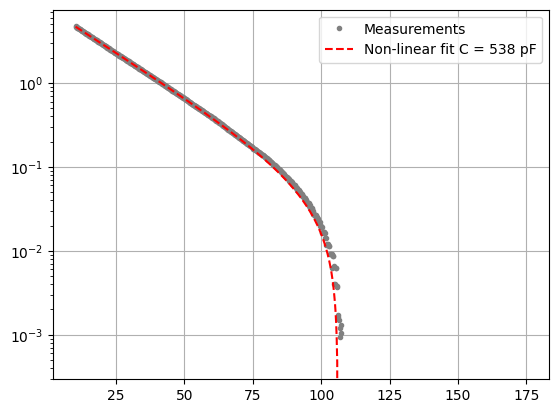

In [10]:
# what if we try non-linear fit?

def model(t, V0, tau, offset):
  return V0 * np.exp(-t/tau) + offset

initial = [5, 25e-6, -0.06]
x_scale = [1, 1e10, 1]

parameters, _ = curve_fit(model, t[discharge_period], Vc[discharge_period], p0=initial)
print(parameters)
tau = parameters[1]
C = tau / R
print(f'Non-linear fit C = {C*1e12:.0f} pF')
plt.plot(t[discharge_period]*1e6, Vc[discharge_period], '.', label='Measurements', color='gray')
plt.plot(t[discharge_period]*1e6, model(t[discharge_period], *parameters),
         color='red', ls='--', label=f'Non-linear fit C = {C*1e12:.0f} pF')
plt.legend()
plt.grid()
plt.yscale('log')

Conclusion: this is a nice expample of how disbalance in uncertainties leads to skewed result in linear regression.

# Microwaves experiment

$$ I(\theta) = I_0 \cos \theta^2 $$

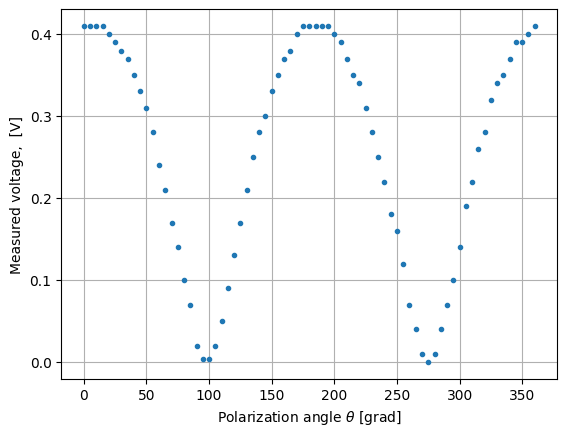

In [11]:
data = '''
# theta1, Voltage [V]
0 0.41
5 0.41
10 0.41
15 0.41
20 0.40
25 0.39
30 0.38
35 0.37
40 0.35
45 0.33
50 0.31
55 0.28
60 0.24
65 0.21
70 0.17
75 0.14
80 0.10
85 0.07
90 0.02
95 0.004
100 0.004
105 0.02
110 0.05
115 0.09
120 0.13
125 0.17
130 0.21
135 0.25
140 0.28
145 0.30
150 0.33
155 0.35
160 0.37
165 0.38
170 0.40
175 0.41
180 0.41
185 0.41
190 0.41
195 0.41
200 0.40
205 0.39
210 0.37
215 0.35
220 0.34
225 0.31
230 0.28
235 0.25
240 0.22
245 0.18
250 0.16
255 0.12
260 0.07
265 0.04
270 0.01
275 0.
280 0.01
285 0.04
290 0.07
295 0.10
300 0.14
305 0.19
310 0.22
315 0.26
320 0.28
325 0.32
330 0.34
335 0.35
340 0.37
345 0.39
350 0.39
355 0.40
360 0.41
'''

theta_grad, V = np.genfromtxt(data.splitlines()).T

# Convert theta to radians
theta= theta_grad / 180 * np.pi

plt.plot(theta_grad, V, '.')
plt.xlabel(r'Polarization angle $\theta$ [grad]')
plt.ylabel(r'Measured voltage,  [V]')
plt.grid()
plt.show()


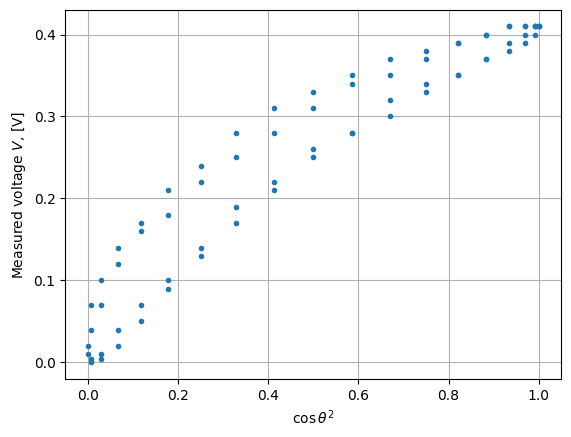

In [12]:
cs = np.cos(theta)**2

# Create the polar plot
plt.figure()

plt.plot(cs, V, '.')
plt.xlabel(r'$\cos \theta^2$')
plt.ylabel(r'Measured voltage $V$, [V]')
plt.grid()
plt.show()


Conclusion: linearization was not successful.

# Non-linear fit. Local optimization

In [13]:
url = 'https://raw.githubusercontent.com/tphlabs/data/refs/heads/main/Lab1_HO/data5000.txt'

t, x = np.genfromtxt(url, skip_header=1, usecols=[1,3], delimiter='\t').T

Tmax = 3
mask = t < Tmax
t = t[mask]
x = x[mask]

from scipy.optimize import curve_fit

def harmonic(x, amp, omega, phi, offset):
  return amp *np.sin(omega * x + phi) +offset

initial = [100,  6.6,  0,  0]
parameters, _ = curve_fit(harmonic, t, x, p0=initial)
x_expected = harmonic(t, *parameters)
print(parameters)


[-113.46582772    6.84902342    0.58338653    0.71716635]


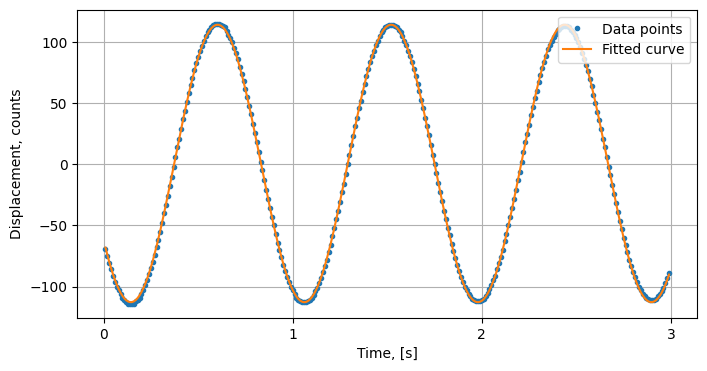

In [14]:
fig, ax = plt.subplots(figsize=(8,4))

plt.plot(t, x,'.', label='Data points')
plt.plot(t, x_expected, label='Fitted curve')

plt.xlabel('Time, [s]')
plt.ylabel('Displacement, counts')
plt.gca().set_xticks([0, 1, 2, 3])
plt.legend(loc='upper right')
plt.grid()

# Dumped oscillator

In [15]:
url = 'https://raw.githubusercontent.com/tphlabs/data/refs/heads/main/Lab3_CO/Experiment_2023.11.26/1dof/free_1.txt'
t, x = np.genfromtxt(url, skip_header=1, usecols=[1,4], delimiter='\t').T

#x -= np.mean(xb)
mask = (t > 0)  & (t< 3)
t = t[mask]
x = x[mask]
t = t[::4]
x = x[::4]

In [16]:
from scipy.optimize import curve_fit

def harmonic(x, amp, tau, omega, phi, offset):
  return amp * np.exp(-t/2/tau)*np.sin(omega * x + phi) +offset

initial = [100, 20, 6.0,      0,   0]
bounds = ([ 75, 0,  5.0, -np.pi, -20],
          [125, 50, 7.0,  np.pi,  20]  )
parameters, _ = curve_fit(harmonic, t, x, p0=initial, bounds=bounds)
x_expected = harmonic(t, *parameters)
print(parameters)

[108.20529269   4.01769347   6.18812637   2.59491801   1.17950182]


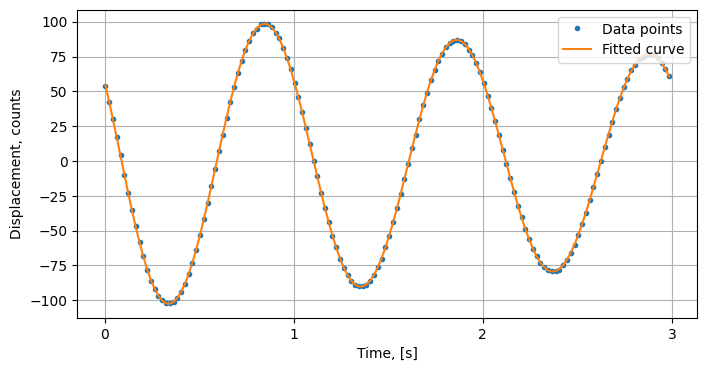

In [17]:
fig, ax = plt.subplots(figsize=(8,4))
plt.plot(t, x,'.', label='Data points')
plt.xlabel('Time, [s]')
plt.ylabel('Displacement, counts')
x_expected = harmonic(t, *parameters)
plt.plot(t, x_expected, label='Fitted curve')
plt.grid()
plt.xlabel('Time, [s]')
plt.ylabel('Displacement, counts')
plt.gca().set_xticks([0, 1, 2, 3])
plt.legend(loc='upper right')

#Beats

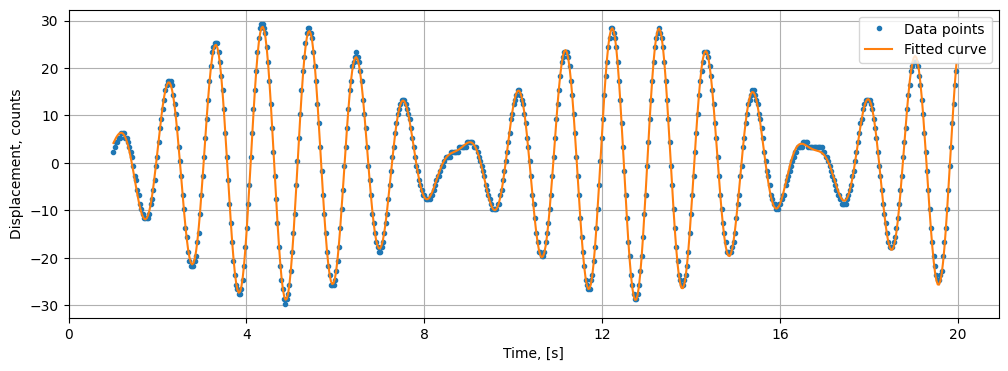

In [18]:
url = 'https://raw.githubusercontent.com/tphlabs/data/refs/heads/main/Lab1_HO//beats/beats_under.txt'

t, x = np.genfromtxt(url, skip_header=1, usecols=[1,3], delimiter='\t').T

x -= np.mean(x)
mask = (t > 1)  & (t< 20)
t = t[mask]
x = x[mask]
t = t[::3]
x = x[::3]

def harmonic2(t, amp1, freq1, phase1, amp2, freq2, phase2):
    return  amp1  * np.sin(t*freq1 + phase1) +\
            amp2  * np.sin(t*freq2 + phase2)

initial = [10, 5.6, 0, 20, 6.4, 0]
parameters, _ = curve_fit(harmonic2, t, x, p0=initial)
x_expected = harmonic2(t, *parameters)

fig, ax = plt.subplots(figsize=(12,4))
plt.plot(t, x,'.', label='Data points')
plt.plot(t, x_expected, label='Fitted curve')
plt.xlabel('Time, [s]')
plt.ylabel('Displacement, counts')
plt.gca().set_xticks([0,4, 8, 12, 16, 20])
plt.grid()
plt.legend(loc='upper right')

What if we try to start from slightly different initial point

[-16.02950221   5.60061901  -0.74706384 -12.92341706   6.38094103
   1.87945763]
[-15.68066134   5.59781049  -0.85287887   3.12993374   5.86773282
   0.92115443]


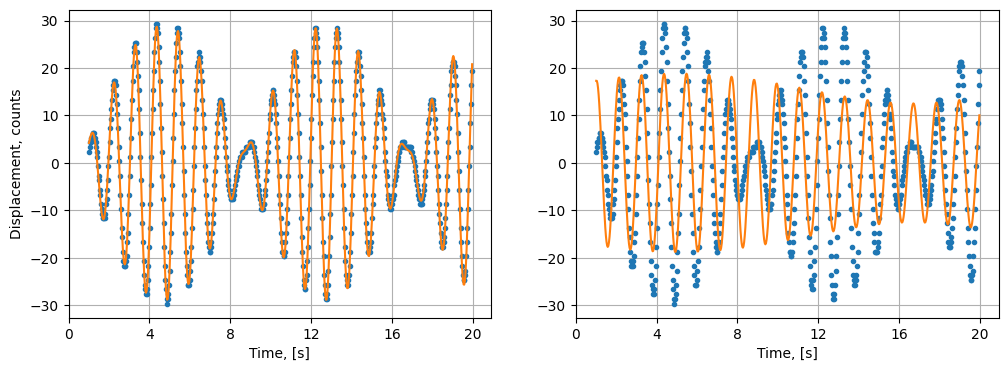

In [19]:
def harmonic2(t, amp1, freq1, phase1, amp2, freq2, phase2):
    return  amp1  * np.sin(t*freq1 + phase1) +\
            amp2  * np.sin(t*freq2 + phase2)

initial = [10, 5.6, 0, 20, 6.1, 0]
parameters, _ = curve_fit(harmonic2, t, x, p0=initial)

print(parameters)
x_expected = harmonic2(t, *parameters)

fig, ax = plt.subplots(1,2, figsize=(12,4))

ax[0].plot(t, x,'.')
ax[0].plot(t, x_expected)
ax[0].set_xlabel('Time, [s]')
ax[0].set_ylabel('Displacement, counts')
ax[0].set_xticks([0,4, 8, 12, 16, 20])
ax[0].grid()


initial = [10, 5.6, 0, 20, 6.0, 0]
parameters, _ = curve_fit(harmonic2, t, x, p0=initial)
print(parameters)
x_expected = harmonic2(t, *parameters)
ax[1].plot(t, x,'.')
ax[1].plot(t, x_expected)
ax[1].set_xlabel('Time, [s]')
ax[1].set_xticks([0,4, 8, 12, 16, 20])
ax[1].grid()


Conclusion: local minima search might be sensetive to initial point.

Synthetic illustration to global - local minima

Text(5.1, 3.9, '')

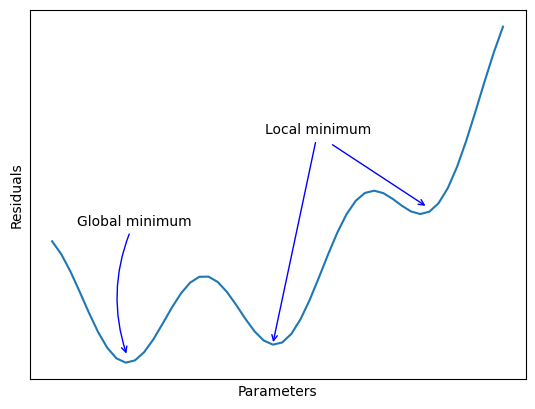

In [20]:
x = np.linspace(-6,12)
y1 = x**2/30 + x/15
y2 = np.cos(x)
y = y1 + y2
plt.plot(x, y)
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.grid()
plt.xlabel('Parameters')
plt.ylabel('Residuals')
arrowprops = dict(arrowstyle='->', color='blue', linewidth=1,
                            connectionstyle='arc3,rad=0.2')
plt.annotate(xy=(-3, -0.75), text='Global minimum', xytext=(-5, 2.1), arrowprops=arrowprops)

arrowprops = dict(arrowstyle='->', color='blue', linewidth=1,
                            connectionstyle='arc,rad=0.2')
plt.annotate(xy=(2.8, -0.5), text='Local minimum', xytext=(2.5, 4.1), arrowprops=arrowprops)
plt.annotate(xy=(9, 2.5), text='', xytext=(5.1, 3.9), arrowprops=arrowprops)

# Global optimization

Sum of sines

$$
y(x) = A_1 \sin(\omega_1 x + \phi_1) + A_2 \sin(\omega_2 x + \phi_2)
$$

In [21]:
import numpy as np
from lmfit import Parameters, minimize
import matplotlib.pyplot as plt

omega1 = 7.10
omega2 = 6.38
Reduced Chi-square = 0.68


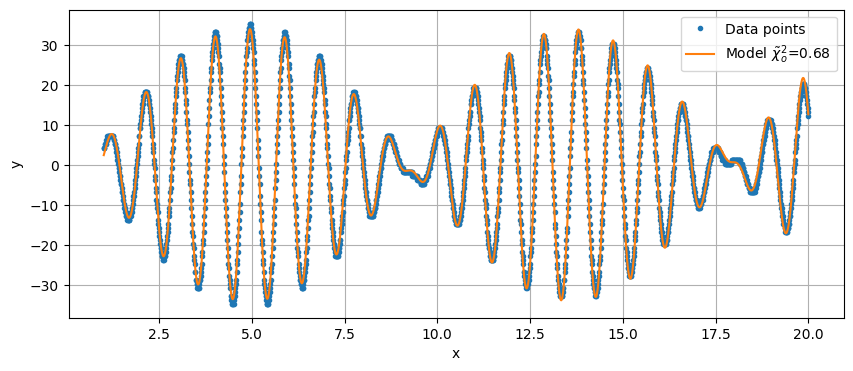

In [22]:
url = 'https://raw.githubusercontent.com/tphlabs/data/refs/heads/main/Lab1_HO//beats/beats_over.txt'

x, y = np.genfromtxt(url, skip_header=1, usecols=[1, 3], delimiter='\t').T

y -= np.mean(y)
mask = x > 1
x = x[mask]
y = y[mask]

# displacement is measured in counts with uncertainty equal to one count
uncertainty = 1

from lmfit import Parameters, minimize

def model(params, x):
    amp1 = params['amp1']
    phase1 = params['phase1']
    omega1 = params['omega1']
    amp2 = params['amp2']
    phase2 = params['phase2']
    omega2 = params['omega2']
    return amp1  * np.sin(x*omega1 + phase1) + amp2  * np.sin(x*omega2 + phase2)

def residual(params, x, y, uncertainty):
    return (model(params, x) - y) / uncertainty

params = Parameters()
params.add('amp1', value=1, min=0, max=20)
params.add('phase1', value=0.0, min=-np.pi, max=np.pi)
params.add('omega1', value=1, min=1, max=10)
params.add('amp2', value=2,  min=0, max=20)
params.add('phase2', value=0.0, min=-np.pi, max=np.pi)
params.add('omega2', value=1, min=1, max=10)

fit = minimize(residual, params, args=(x, y, uncertainty), method='dual_annealing')
y_expected = model(fit.params, x)

omega1 = fit.params['omega1'].value
omega2 = fit.params['omega2'].value
chi2_reduced = fit.redchi
print(f'omega1 = {omega1:.2f}')
print(f'omega2 = {omega2:.2f}')
print(f'Reduced Chi-square = {chi2_reduced:.2f}')

fig, ax = plt.subplots(figsize=(10,4))
plt.plot(x, y, '.', label='Data points')
plt.plot(x, y_expected, label=fr'Model $\tilde\chi^2_o$={chi2_reduced:.2f}')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.grid()